# HW2
# Mohammadreza Yadegari

### My dataset is the 'Advertising Dataset,' which concerns the use of advertising through three methods: TV, radio, and newspaper. It demonstrates the relationship between advertising expenditures on these three mediums and sales.


### This is the link for download https://www.kaggle.com/ashydv/advertising-dataset/download

In [ ]:
import csv
import random
import math
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def loadDataset(filename):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        headers = dataset[0]
        dataset = dataset[1: len(dataset)]
        return dataset , headers
dataset , headers = loadDataset('Advertising Dataset.csv')
print("HEADERS")
print(headers)
dataset = np.array(dataset)
dataset = dataset.astype(float)
print("Dataset Size")
print(len(dataset), "X", len(dataset[0]))

X = dataset[:, 1:-1]
X = X/296.4
Y = dataset[:, -1]
Y = (Y - 1.6)/25.5
Y = np.array(Y).reshape((len(Y),1))
print("Size of X")
print(X.shape)
print("Size of Y")
print(Y.shape)
print(X[0:5])
print(Y[0:5])
print(len(X))

HEADERS
['S.no', 'TV', 'radio', 'newspaper', 'sales']
Dataset Size
200 X 5
Size of X
(200, 3)
Size of Y
(200, 1)
[[0.77631579 0.12753036 0.23346829]
 [0.15013495 0.13259109 0.15215924]
 [0.05802969 0.1548583  0.23380567]
 [0.5111336  0.13933873 0.19736842]
 [0.6099865  0.03643725 0.19703104]]
[[0.80392157]
 [0.34509804]
 [0.30196078]
 [0.6627451 ]
 [0.44313725]]
200


In [ ]:
def train_test_split(X, Y, split):


    indices = np.array(range(len(X)))

    train_size = round(split * len(X))

    train_indices = indices[0:train_size]
    test_indices = indices[train_size:len(X)]


    X_train = X[train_indices, :]
    X_test = X[test_indices, :]
    Y_train = Y[train_indices, :]
    Y_test = Y[test_indices, :]
    return X_train,Y_train, X_test, Y_test

In [ ]:
split = 0.8
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, split)

In [ ]:
print ("TRAINING SET")
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)

print("TESTING SET")
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

TRAINING SET
X_train.shape:  (160, 3)
Y_train.shape:  (160, 1)
TESTING SET
X_test.shape:  (40, 3)
Y_test.shape:  (40, 1)


### Create base functions

In [ ]:
def base_function(g,y,z,m):
    c = []
    for i in range(m):
        for j in range(m):
            for k in range(m):
                if (((i + j + k) <= m)):
                        c.append((g**i)*(y**j)*(z**k))

    c.append(g**m)
    c.append(y**m)
    c.append(z**m)
    return(c)



### Create design matrix

In [ ]:
def design_matrix(v,m):
    f = []
    for i in range(len(v)):
        f.append(base_function(v[i][0],v[i][1],v[i][2],m))
    return(f)


In [ ]:
def predict(ww, F):
    return F @ ww

In [ ]:
def RMSE(h,p):
    N = len(h)
    c = p - h

    return np.sqrt((1 / ( N)) * (c.T @ c))

### Normal equation

In [ ]:
def normal_equation(Fa, Ya ):
    w = np.linalg.inv(Fai_train.T @ Fai_train) @ Fai_train.T @ Y_train
    return w

In [ ]:
m = 7 # Hyper parameter or degree of the polynomial.we can change it
Fai_train = np.array(design_matrix(X_train,m))
wight = normal_equation(Fai_train, Y_train)
p_train = predict(wight,Fai_train)
Fai_test = np.array(design_matrix(X_test,m))
p_test = predict(wight, Fai_test)
trr = RMSE(Y_train,p_train)
tss = RMSE(Y_test,p_test)

In [ ]:
rmse_train = RMSE(Y_train,p_train)
rmse_test = RMSE(Y_test,p_test)
print(rmse_train)
print(rmse_test)

[[0.00722399]]
[[1.45419579]]



### You can see plot of train data without regularization

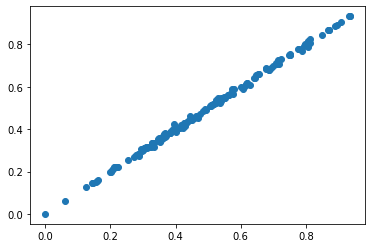

In [ ]:
plt.scatter(p_train , Y_train)
plt.show()


### In these seven cells, we can observe Task CF, which involves learning using the closed-form equation. This is a Full Batch learning approach that solves the linear equation system derived from Regularized Linear Regression with Quadratic Regularization, also known as Tikhonov Regularization or Ridge Regression.
### In cell 7, we can see a plot based on the different LAMBDA values.


In [ ]:
def regularized_normal_equation(Fa, Ya , lambd):
    I = np.eye(len(Fai_train[0]))
    w = (np.linalg.inv((Fai_train.T @ Fai_train) + (lambd * I))) @ Fai_train.T @ Y_train
    return w

In [ ]:
m = 7 # Hyper parameter or degree of the polynomial.we can change it
lambdas = [0.00001,0.0001,0.001,0.01,0.1,1,10]
netr = []
nets = []
for lamb in lambdas:
    Fai_train = np.array(design_matrix(X_train,m))
    wight = regularized_normal_equation(Fai_train, Y_train, lamb)
    p_train = predict(wight,Fai_train)
    Fai_test = np.array(design_matrix(X_test,m))
    p_test = predict(wight, Fai_test)
    trr = RMSE(Y_train,p_train)
    tss = RMSE(Y_test,p_test)
    netr.append(trr)
    nets.append(tss)

In [ ]:
f = []
print(len(netr))
for i in range(len(netr)):
    f.append(netr[i][0][0])
f

7


[0.014981711985326803,
 0.016341437095762554,
 0.01870195885636681,
 0.02389287357306489,
 0.03641809164180151,
 0.08140390163275595,
 0.12311632432836515]

In [ ]:
j = []
for i in range(len(nets)):
    j.append(nets[i][0][0])
j

[0.011895249621894031,
 0.012217834307874206,
 0.012433321633057708,
 0.017420279834758332,
 0.03382573456189888,
 0.09345510286579727,
 0.1305543235148339]

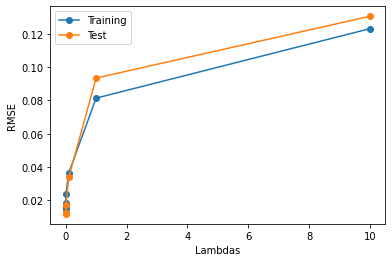

<Figure size 7200x432 with 0 Axes>

In [ ]:
plt.plot(np.array(lambdas), np.array(f), label='Training', marker = 'o')
plt.plot(lambdas, j, label='Test', marker = 'o')
plt.legend()
plt.xlabel("Lambdas")
plt.ylabel("RMSE")
plt.figure(figsize=(100, 6))
plt.show()

### In these seven cells, we can observe Task GD_Q, which includes a plot for the different cost functions based on various values of LAMBDA over 10,000 epochs.
### In cell 7, we can see a plot based on the different LAMBDA values.

In [ ]:
def sse_cost(X, w, Y):
    N = len(Y)
    c = (X @ w) - Y

    return (1 / (2 * N)) * (c.T @ c)

In [ ]:
def sse_gradient(X, w, Y):
    N = len(Y)

    return (1 / N) * (X.T @ ((X @ w) - Y))


def Q_reg_gradient_descent(gradient, X, Y, lamb, epochs, lr=0.01, convergence_delta=0.001):
    w = np.zeros((len(X[0]),1))
    costs = []
    costs.append(sse_cost(X, w, Y))
    N = len(Y)
    for _ in range(epochs):
        nabla = gradient(X, w, Y)
        w = w * (1 - lr * (lamb/N)) - lr * nabla
        costs.append(sse_cost(X, w, Y))
        if costs[-1] > costs[-2]:
            lr = lr / 2

        if np.linalg.norm(nabla) < convergence_delta:
            print('Converged')
            break

    #print(costs[4].shape)
    #print(costs[3:])
    for i in range(len(costs)):
        costs[i] = costs[i].reshape(-1,)

    plt.plot(costs[3:])
    plt.show()
    return w

In [ ]:
m = 7 # Hyper parameter
Phi = np.array(design_matrix(X_train,m))
Phi_test = np.array(design_matrix(X_test,m))

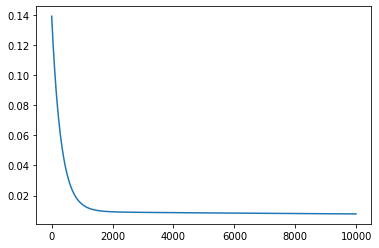

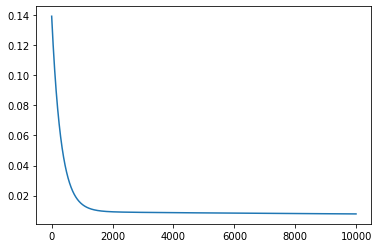

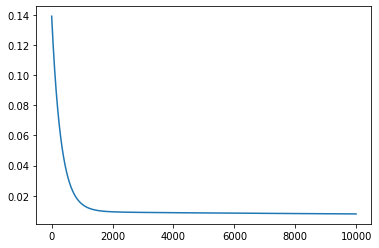

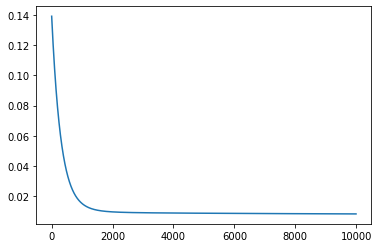

Error on test data: [[0.00922136]]
Error for each lambda on TestData is: [array([[0.00957573]]), array([[0.0095711]]), array([[0.00952622]]), array([[0.00922136]])]


In [ ]:
lambdas = [0.01, 0.1, 1, 10]
Error_on_testdata_QGD = []
rmse_test_q_gd = []
rmse_train_q_gd = []
for lambd in lambdas:
    w = Q_reg_gradient_descent(sse_gradient, Phi, Y_train, lambd, 10000, lr=0.001)
    Error_on_testdata_QGD.append(sse_cost(Phi_test, w, Y_test))
    rmse_test_q_gd.append(RMSE(predict(w , Phi_test),Y_test))
    rmse_train_q_gd.append(RMSE(predict(w, Phi), Y_train))
print(f'Error on test data: {sse_cost(Phi_test, w, Y_test)}')
print(f'Error for each lambda on TestData is: {Error_on_testdata_QGD}')

In [ ]:
v = []
for i in range(len(rmse_train_q_gd)):
    v.append(rmse_train_q_gd[i][0][0])
v

[0.12538043825261092,
 0.12540967572784814,
 0.12571079831709944,
 0.1295120962446423]

In [ ]:
c = []
for i in range(len(rmse_test_q_gd)):
    c.append(rmse_test_q_gd[i][0][0])
c

[0.13838882469155878,
 0.13835530497656723,
 0.1380305910103194,
 0.13580401050099136]

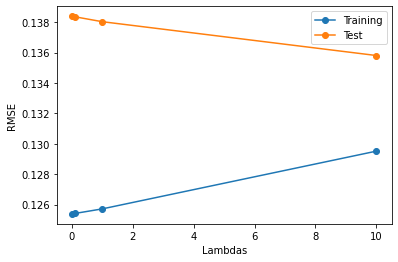

<Figure size 7200x432 with 0 Axes>

In [ ]:
plt.plot(lambdas, v , label='Training', marker = 'o')
plt.plot(lambdas, c, label='Test', marker = 'o')
plt.legend()
plt.xlabel("Lambdas")
plt.ylabel("RMSE")
plt.figure(figsize=(100, 6))
plt.show()

### In these six cells, we can observe Task GD_L, which includes a plot for different cost functions based on various values for LAMBDA over 10,000 epochs.
### In cell 6, we can see a plot based on the different LAMBDA values.

In [ ]:
def sse_gradient(X, w, Y):
    N = len(Y)

    return (1 / N) * (X.T @ ((X @ w) - Y))


def L_reg_gradient_descent(gradient, X, Y, lamb, epochs, lr=0.01, convergence_delta=0.001):
    w = np.zeros((len(X[0]),1))
    costs = []
    costs.append(sse_cost(X, w, Y))
    N = len(Y)
    for _ in range(epochs):
        nabla = gradient(X, w, Y)
        w = w - lr * nabla - (2 * lr * (lamb/N) * np.sign(w))
        costs.append(sse_cost(X, w, Y))
        if costs[-1] > costs[-2]:
            lr = lr / 2

        if np.linalg.norm(nabla) < convergence_delta:
            print('Converged')
            break

    #print(costs[4].shape)
    #print(costs[3:])
    for i in range(len(costs)):
        costs[i] = costs[i].reshape(-1,)

    plt.plot(costs[3:])
    plt.show()
    return w

In [ ]:
m = 7 # Hyper parameter
Phi = np.array(design_matrix(X_train,m))
Phi_test = np.array(design_matrix(X_test,m))

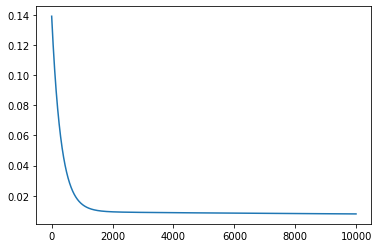

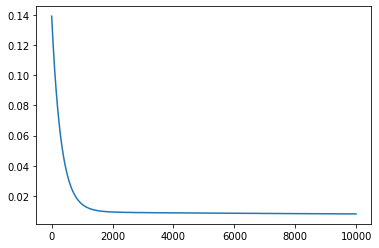

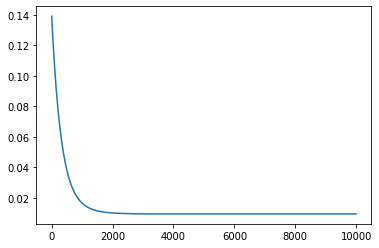

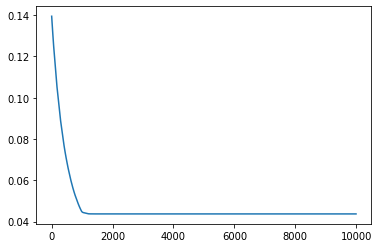

Error on test data: [[0.04039273]]
Error for each lambda on TestData is: [array([[0.00960891]]), array([[0.00985371]]), array([[0.01012513]]), array([[0.04039273]])]


In [ ]:
lambdas = [0.01, 0.1, 1, 10]
Error_on_testdata_GD_L = []
rmse_test_l_gd = []
rmse_train_l_gd = []
ww_gd_l = []
for lambd in lambdas:
    w = L_reg_gradient_descent(sse_gradient, Phi, Y_train, lambd, 10000, lr=0.001)
    Error_on_testdata_GD_L.append(sse_cost(Phi_test, w, Y_test))
    rmse_test_l_gd.append(RMSE(predict(w , Phi_test),Y_test))
    rmse_train_l_gd.append(RMSE(predict(w, Phi), Y_train))
    ww_gd_l.append(w)
print(f'Error on test data: {sse_cost(Phi_test, w, Y_test)}')
print(f'Error for each lambda on TestData is: {Error_on_testdata_GD_L}')

In [ ]:
u = []
for i in range(len(rmse_train_l_gd)):
    u.append(rmse_train_l_gd[i][0][0])
u

[0.12556915356900167,
 0.12712132007334687,
 0.13830936631056712,
 0.29562750442847574]

In [ ]:
o = []
for i in range(len(rmse_test_l_gd)):
    o.append(rmse_test_l_gd[i][0][0])
o

[0.13862832458927976,
 0.1403830849333573,
 0.1423034425365521,
 0.284227828742171]

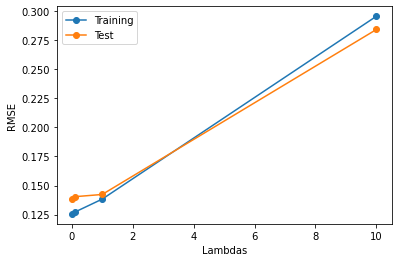

<Figure size 7200x432 with 0 Axes>

In [ ]:
plt.plot(lambdas, u , label='Training', marker = 'o')
plt.plot(lambdas, o, label='Test', marker = 'o')
plt.legend()
plt.xlabel("Lambdas")
plt.ylabel("RMSE")
plt.figure(figsize=(100, 6))
plt.show()

In [ ]:
print('shape of weights for different lambdas is:', np.array(ww_gd_l).shape)
print('non-zeros weights is:',np.count_nonzero(ww_gd_l))

shape of weights for different lambdas is: (4, 120, 1)
non-zeros weights is: 480


### In these six cells, we can observe Task SGD_Q, which includes a plot for different cost functions based on various values of LAMBDA over 100 epochs.
### In cell 6, we can see a plot based on the different LAMBDA values.

In [ ]:
def ss_gradient(X, w, Y):
    N = len(Y)

    return (1 / N) * (X.T @ ((X @ w) - Y))


def Q_reg_S_gradient_descent(gradient, X, Y, lamb, epochs, lr=0.01, convergence_delta=0.001):
    w = np.zeros((len(X[0]),1))
    costs = []
    costs.append(sse_cost(X, w, Y))
    N = len(Y)
    for _ in range(epochs):
        for i in range(len(X)):
            random_index=np.random.randint(len(X))
            nabla = gradient(X[random_index:random_index+1], w, Y[random_index:random_index+1])
            w = w * (1 - lr * (lamb/N)) - lr * nabla
            costs.append(sse_cost(X, w, Y))
            if costs[-1] > costs[-2]:
                lr = lr / 2

        if np.linalg.norm(nabla) < convergence_delta:
            print('Converged')
            break

    #print(costs[4].shape)
    #print(costs[3:])
    for i in range(len(costs)):
        costs[i] = costs[i].reshape(-1,)

    plt.plot(costs[3:])
    plt.show()
    return w

In [ ]:
m = 7 # Hyper parameter
Phi = np.array(design_matrix(X_train,m))
Phi_test = np.array(design_matrix(X_test,m))

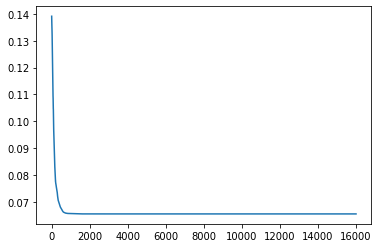

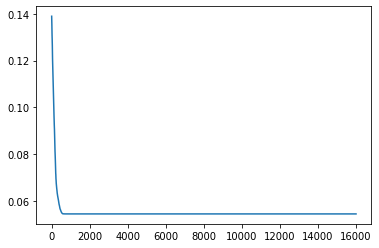

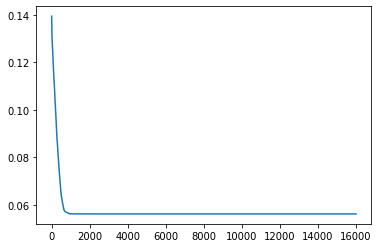

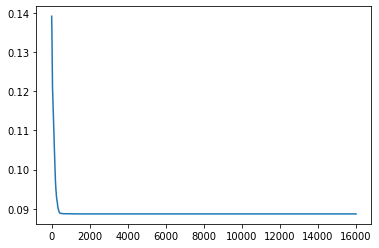

Error on test data: [[0.08229628]]
Error for each lambda on TestData is: [array([[0.05818478]]), array([[0.04752875]]), array([[0.04910526]]), array([[0.08229628]])]


In [ ]:
lambdas = [0.01, 0.1, 1, 10]
Error_on_testdata_QSGD = []
rmse_test_q_sgd = []
rmse_train_q_sgd = []
for lambd in lambdas:
    w = Q_reg_S_gradient_descent(ss_gradient, Phi, Y_train, lambd, 100, lr=0.001)
    Error_on_testdata_QSGD.append(sse_cost(Phi_test, w, Y_test))
    rmse_test_q_sgd.append(RMSE(predict(w , Phi_test),Y_test))
    rmse_train_q_sgd.append(RMSE(predict(w, Phi), Y_train))
print(f'Error on test data: {sse_cost(Phi_test, w, Y_test)}')
print(f'Error for each lambda on TestData is: {Error_on_testdata_QSGD}')

In [ ]:
l = []
for i in range(len(rmse_train_q_sgd)):
    l.append(rmse_train_q_sgd[i][0][0])
l

[0.36182829532274247,
 0.32997033422622074,
 0.33509485763405283,
 0.4211369712756078]

In [ ]:
p = []
for i in range(len(rmse_test_q_sgd)):
    p.append(rmse_test_q_sgd[i][0][0])
p

[0.3411298169189289,
 0.3083139492818854,
 0.31338556940782286,
 0.40570008224743287]

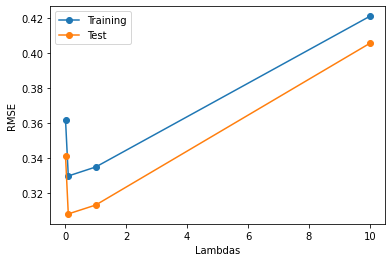

<Figure size 7200x432 with 0 Axes>

In [ ]:
plt.plot(lambdas, l , label='Training', marker = 'o')
plt.plot(lambdas, p, label='Test', marker = 'o')
plt.legend()
plt.xlabel("Lambdas")
plt.ylabel("RMSE")
plt.figure(figsize=(100, 6))
plt.show()

### In these six cells, we can observe Task SGD_L, which includes a plot for different cost functions based on various values of LAMBDA over 100 epochs
### In cell 6, we can see a plot based on the different LAMBDA values.

In [ ]:
def ss_gradient(X, w, Y):
    N = len(Y)

    return (1 / N) * (X.T @ ((X @ w) - Y))


def L_reg_S_gradient_descent(gradient, X, Y, lamb, epochs, lr=0.01, convergence_delta=0.001):
    w = np.zeros((len(X[0]),1))
    costs = []
    costs.append(sse_cost(X, w, Y))
    N = len(Y)
    for _ in range(epochs):
        for i in range(len(X)):
            random_index=np.random.randint(len(X))
            nabla = gradient(X[random_index:random_index+1], w, Y[random_index:random_index+1])
            w = w - lr * nabla + (2 * lr * (lamb/N) * np.sign(w))
            costs.append(sse_cost(X, w, Y))
            if costs[-1] > costs[-2]:
                lr = lr / 2

        if np.linalg.norm(nabla) < convergence_delta:
            print('Converged')
            break

    #print(costs[4].shape)
    #print(costs[3:])
    for i in range(len(costs)):
        costs[i] = costs[i].reshape(-1,)

    plt.plot(costs[3:])
    plt.show()
    return w

In [ ]:
m = 7 # Hyper parameter
Phi = np.array(design_matrix(X_train,m))
Phi_test = np.array(design_matrix(X_test,m))

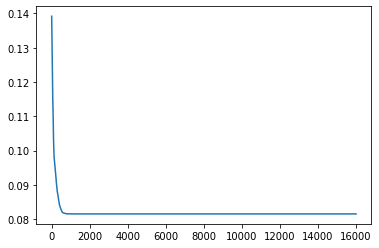

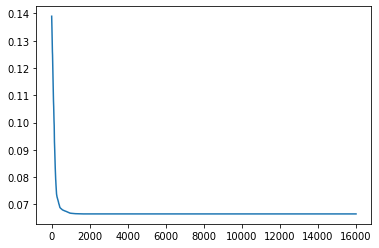

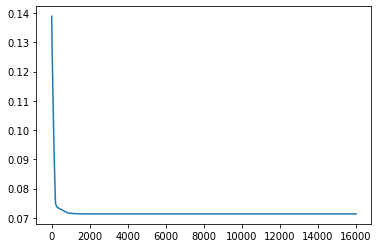

Converged


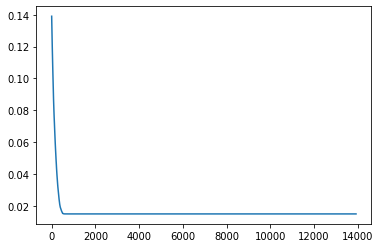

Error on test data: [[0.01224193]]
Error for each lambda on TestData is: [array([[0.07481001]]), array([[0.05980498]]), array([[0.06412509]]), array([[0.01224193]])]


In [ ]:
lambdas = [0.01, 0.1, 1, 10]
Error_on_testdata_SGD_L = []
rmse_test_l_sgd = []
rmse_train_l_sgd = []
ww_sgd_l = []
for lambd in lambdas:
    w = L_reg_S_gradient_descent(ss_gradient, Phi, Y_train, lambd, 100, lr=0.001)
    Error_on_testdata_SGD_L.append(sse_cost(Phi_test, w, Y_test))
    rmse_test_l_sgd.append(RMSE(predict(w , Phi_test),Y_test))
    rmse_train_l_sgd.append(RMSE(predict(w, Phi), Y_train))
    ww_sgd_l.append(w)
print(f'Error on test data: {sse_cost(Phi_test, w, Y_test)}')
print(f'Error for each lambda on TestData is: {Error_on_testdata_SGD_L}')


In [ ]:
s = []
for i in range(len(rmse_train_l_sgd)):
    s.append(rmse_train_l_sgd[i][0][0])
s

[0.4038035430317428,
 0.36480442861657053,
 0.3777618773775681,
 0.17314565399261497]

In [ ]:
z = []
for i in range(len(rmse_test_l_sgd)):
    z.append(rmse_test_l_sgd[i][0][0])
z

[0.3868074820999527,
 0.34584673228582846,
 0.3581203518817988,
 0.15647316176417003]

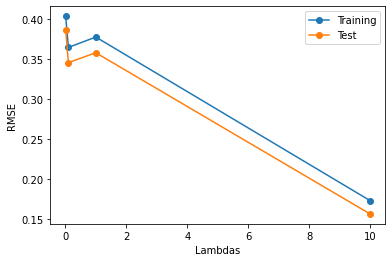

<Figure size 7200x432 with 0 Axes>

In [ ]:
plt.plot(lambdas, s , label='Training', marker = 'o')
plt.plot(lambdas, z, label='Test', marker = 'o')
plt.legend()
plt.xlabel("Lambdas")
plt.ylabel("RMSE")
plt.figure(figsize=(100, 6))
plt.show()

In [ ]:
print('shape of weights for different lambdas is:', np.array(ww_sgd_l).shape)
print('non-zeros weights is:',np.count_nonzero(ww_sgd_l))

shape of weights for different lambdas is: (4, 120, 1)
non-zeros weights is: 480
